loaded (5000, 4096) (5000, 6)


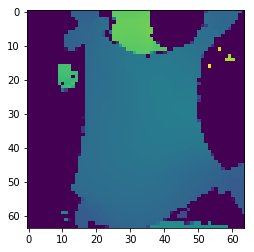

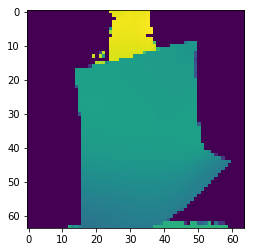

[0.24730836633201436, 0.06867838002861543, 0.30914943000000006, 0.3269097375618308, -0.20176978997138456, 0.27866456000000006]


In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from predict import *
from util import *
class Finder:
    def __init__(self, depth_sim, pos_sim):
        self.use_simple=True
        self.debug=False
        self.pos_sim = pos_sim
        self.depth_sim = depth_sim
        if self.use_simple:
            self.nn = Nearest(depth_sim)
        
        pass
    
    def get_target(self, vec):
        if self.use_simple:
            pred, ans = nearest_predict(vec=vec
                                      ,mat=self.depth_sim
                                      ,pos=self.pos_sim)
        else:
            dist, ans = self.nn.findNeigh(depth_orig[i,:])
            pred = pos_sim[ans]
        if self.debug:
            vis_depth(depth_orig[i,:])
            vis_depth(depth_sim[ans,:])
        
        pred = pred.tolist()
        pred = pred[-3:]+pred[:3]
        return pred, self.depth_sim[ans]

if __name__=="__main__":
    sim_dir = '22/fix5'
    depth_sim = np.load(os.path.join(sim_dir,'depth_sim_bg2.npy'))

    pos_sim = np.load(os.path.join(sim_dir,'expert.npy'))
    print("loaded",depth_sim.shape, pos_sim.shape)

    finder = Finder(depth_sim, pos_sim)

    orig_dir = '22'
    depth_orig = np.load(os.path.join(orig_dir,'depth_orig.npy'))

    # depth_sim = np.load('realtest/depth_sim_real.npy')
    # pos_sim = np.load('realtest/handles.npy')[:,-6:]
    ind = 0
    vec = depth_orig[ind,:]
    target, matched = finder.get_target(vec)
    vis_depth(vec)
    vis_depth(matched)
    print(target)
    



[0.22214873963603932, 0.11421609371007727, 0.30914943000000006, 0.2631101405986682, -0.1562320762899227, 0.27866456000000006]


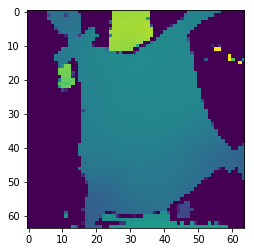

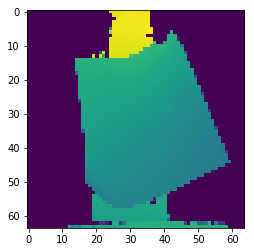

In [76]:
import random
ind = random.randint(1,depth_orig.shape[0])
vec = depth_orig[ind,:]
target, matched = finder.get_target(vec)
print(target)
vis_depth(vec)
vis_depth(matched)